## Parte Computacional Punto 3
### Coordenadas parabólicas

Autores: Juan Fernando Riascos y Thomas Martinod

En este `.ipynb` se presenta brevemente la segunda parte del tercer numeral de la segunda tarea de Mecánica Clásica... Vamos a resolver numéricamente las ecuaciones de Lagrange para diferentes condiciones iniciales y analizar los resultados.

Inicialmente, vamos a usar `sympy` para definir las variables simbólicamente, luego aplicar `lambdiify` y así obtener funciones, de modo que luego se usará `scipy.integrate.odeint` para resolver las ecuaciones de Euler Lagrange (EL).

In [2]:
# Importe de librerías
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

from sympy.physics.mechanics import *
init_vprinting(pretty_print=True)

# Definimos las variables simbólicas
t, m = smp.symbols('t, m')

tau, sig = smp.symbols('tau, sigma', cls=smp.Function)
tau, sig = tau(t), sig(t)
tau

In [3]:
# Definimos las derivadas de las coordenadas
dtau = smp.diff(tau, t)
dsig = smp.diff(sig, t)

d2tau = smp.diff(dtau, t)
d2sig = smp.diff(dsig, t)

d2sig

In [4]:
# Definimos el Lagrangiano
L = smp.Rational(1,2) * m * (tau**2 + sig**2) * (dtau**2 + dsig**2)

Recordemos que las ecuaciones EL son:

$$    \frac{\partial L}{\partial u_i} - \frac{d}{dt}\left(\frac{\partial L}{\partial \dot{u}_i}\right) = 0 $$

o también se escriben:

$$L_{u_i} - \frac{d}{dt} L_{\dot{u}_i} = 0$$

Comencemos con $u_i = \tau$.

In [5]:
L_tau = smp.diff(L, tau)
L_tau

In [6]:
L_dtau = smp.diff(L, dtau)
L_dtau

In [7]:
dL_dtau = smp.diff(L_dtau, t)
dL_dtau

In [8]:
EL1 = smp.Eq(L_tau - dL_dtau, 0)
EL1

Ahora obtengamos la segunda ecuación de Euler Lagrange con $u_i = \sigma$:

In [9]:
L_sig = smp.diff(L, sig)

In [10]:
L_dsig = smp.diff(L, dsig)

In [11]:
dL_dsig = smp.diff(L_dsig, t)

In [12]:
EL2 = smp.Eq(L_sig - dL_dsig, 0)
EL2

Dadas estas dos ecuaciones diferenciales de segundo orden, despejemos $\ddot{\tau}$ y $\ddot{\sigma}$:

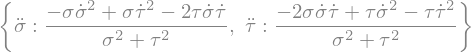

In [16]:
sln = smp.solve([EL1, EL2], (d2tau, d2sig))
sln

Inicialmente, necesitamos cuatro EDOs de primer orden a partir de las dos EDOs de segundo orden que obtuvimos. Para ello definimos las variables auxiliares $z_\tau$ y $z_\sigma$ como:

$$ \frac{d\tau}{dt} =: z_\tau$$
$$ \frac{d\sigma}{dt} =: z_\sigma$$


Obteniendo entonces el sistema de cuatro EDOs de primer orden:

$$ \frac{d\tau}{dt} = z_\tau$$
$$\frac{d z_{\tau}}{dt} = \frac{- 2 \sigma z_{\sigma} z_{\tau}+ \tau (z_{\sigma})^{2} - \tau (z_{\tau})^2}{\sigma^{2} + \tau^{2}}$$
$$ \frac{d\sigma}{dt} = z_\sigma$$
$$ \frac{dz_{\sigma}}{dt} = \frac{-\sigma (z_{\sigma})^2 + \sigma (z_{\tau})^2 - 2\tau z_{\sigma} z_\tau}{\sigma^2 + \tau^2} $$






Necesitamos convertir las anteriores funciones simbólicas a numéricas. Para ello usamos `smp.lambdify`.


